# Parte I: Analizando la base

## Ejercicio 2

In [1]:
# Importamos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from google.colab import drive

## a) Cargar bases y limpieza región


In [2]:
df_2004 = pd.read_stata("/content/Individual_t104.dta") # leemos archivo 2004
df_2004.drop(df_2004[df_2004["region"] != "Gran Buenos Aires"].index, axis=0) # eliminamos datos que no corresponden a GCBA

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,288171,1.0,3.0,0.0,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1454.0,...,08,,08,08,,09,0.0,0.0,0.0,00000
7643,288405,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,02,,02,02,,02,0.0,0.0,0.0,00000
7644,288405,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,02,,02,02,,02,0.0,0.0,0.0,00000
7645,288405,1.0,3.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,02,,02,02,,02,0.0,0.0,0.0,00000


In [3]:
df_2024 = pd.read_excel('/content/usu_individual_T124.xlsx') # leemos archivo 2024
df_2024.drop(df_2024[df_2024["REGION"] != 1].index, axis=0) # eliminamos datos que no corresponden a GCBA
(df_2024["REGION"] != 1).sum()

38999

## a bis) Juntar trimestres

In [4]:
# Cambiamos los nombres de las columnas a minúsculas
df_2004.columns = df_2004.columns.str.lower()

# Cambiamos los nombres de las columnas a minúsculas
df_2024.columns = df_2024.columns.str.lower()

In [5]:
# Agregar una columna para identificar el año en df_2004
df_2004['anio'] = 2004

# Agregar una columna para identificar el año en df_2024
df_2024['anio'] = 2024

In [6]:
# Comparar las columnas de ambos
diferentes_1 = set(df_2004.columns) - set(df_2024.columns)  # Columnas que están en df_2004 pero no en df_2024
diferentes_2 = set(df_2024.columns) - set(df_2004.columns)  # Columnas que están en df_2024 pero no en df_2004

print(f"Columnas en df_2004 pero no en df_2024: {diferentes_1}")
print(f"Columnas en df_2024 pero no en df_2004: {diferentes_2}")

Columnas en df_2004 pero no en df_2024: {'pj3_1', 'idimpp', 'pj2_1', 'pj1_1'}
Columnas en df_2024 pero no en df_2004: {'ch05', 'imputa', 'pondiio', 'pondii', 'pondih'}


In [7]:
# Eliminamos las columnas que no coinciden en ambos data frames
df_2004 = df_2004.drop(columns=['pj3_1', 'pj1_1', 'idimpp', 'pj2_1'])
df_2024 = df_2024.drop(columns=['imputa', 'pondii', 'pondiio', 'pondih', 'ch05'])

In [8]:
# Concatenar los DataFrames por filas (eje 0)
df_completo = pd.concat([df_2004, df_2024], axis=0)

# Ver el DataFrame resultante
df_completo.head()

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,anio
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,,01,368.0,07,,06,06,,04,2004
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,,00,0.0,00,,00,00,,00,2004
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,,02,440.0,07,,07,07,,05,2004
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,,08,532.5,08,,08,08,,06,2004
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,,08,532.5,08,,08,08,,06,2004


In [9]:
len(df_completo)

91339

## b) Limpieza: Datos inusuales y faltantes

### Observamos df_completo

In [10]:
df_completo.describe() #valores relevantes df
columnas = df_completo.columns.tolist() #columnas df

# Contar el número total de columnas
cantidad_columnas = len(columnas)
print(f"Cantidad de columnas: {cantidad_columnas}")
print("Columnas:", columnas)

Cantidad de columnas: 173
Columnas: ['codusu', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08

In [11]:
# Decidimos seleccionar algunas columnas relevantes
columnas_seleccionadas = ['anio','ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'nivel_ed', 'estado', 'cat_inac', 'ipcf'] # agregamos ch09
df_completo = df_completo[columnas_seleccionadas] # ya filtramos por región antes

In [12]:
# observamos los datos
df_completo.describe() #valores relevantes df
df_completo.head()

,anio,ch04,ch06,ch07,ch08,ch09,nivel_ed,estado,cat_inac,ipcf
0,2004,Varón,79.0,Viudo,Obra social (incluye PAMI),Sí,Secundaria Incompleta,Inactivo,Jubilado/pensionado,368.0
1,2004,Mujer,67.0,Separado o divorciado,No paga ni le descuentan,Sí,Primaria Completa,Ocupado,0.0,0.0
2,2004,Mujer,74.0,Viudo,Obra social (incluye PAMI),Sí,Primaria Completa,Inactivo,Jubilado/pensionado,440.0
3,2004,Varón,54.0,Casado,Mutual/Prepaga/Servicio de emergencia,Sí,Primaria Completa,Ocupado,0.0,532.5
4,2004,Mujer,51.0,Casado,Mutual/Prepaga/Servicio de emergencia,Sí,Superior Universitaria Completa,Inactivo,Ama de casa,532.5


In [13]:
df_completo["estado"].unique()
len(df_completo["estado"])

91339

### Evaluamos tipo de datos de las colmnas y mapeamos

In [14]:
# Evaluamos contenido de las columnas (tipo de datos)
def tipos_de_datos(df):
    """
    Muestra los tipos de datos únicos en cada columna del DataFrame.
    Además, verifica si una columna contiene elementos de diferentes tipos.
    """
    for columna in df.columns:
        tipos_unicos = df[columna].map(type).unique()  # Obtener los tipos únicos en la columna
        if len(tipos_unicos) > 1:
            print(f"\n La columna '{columna}' tiene múltiples tipos de datos; las variables son {df[columna].unique()}")
        else:
            print(f"\n La columna '{columna}' tiene un único tipo de datos;las variables son {df[columna].unique()}")

tipos_de_datos(df_completo)


 La columna 'anio' tiene un único tipo de datos;las variables son [2004 2024]

 La columna 'ch04' tiene múltiples tipos de datos; las variables son ['Varón' 'Mujer' 2 1]

 La columna 'ch06' tiene múltiples tipos de datos; las variables son [79.0 67.0 74.0 54.0 51.0 25.0 20.0 55.0 48.0 17.0 15.0 77.0 50.0 49.0
 26.0 22.0 18.0 86.0 62.0 76.0 45.0 41.0 21.0 31.0 19.0 52.0 12.0 32.0
 29.0 64.0 10.0 47.0 43.0 13.0 3.0 46.0 78.0 60.0 59.0 37.0 44.0 30.0 63.0
 71.0 87.0 34.0 14.0 24.0 28.0 27.0 69.0 56.0 33.0 66.0 61.0 1.0 92.0
 'Menos de 1 año' 65.0 57.0 23.0 4.0 40.0 16.0 9.0 83.0 6.0 38.0 75.0 11.0
 53.0 73.0 39.0 35.0 7.0 5.0 36.0 8.0 82.0 85.0 72.0 70.0 89.0 42.0 2.0
 58.0 68.0 81.0 80.0 93.0 96.0 84.0 90.0 94.0 88.0 '98 y más años' 91.0
 97.0 95.0 -1 98 99 101 100]

 La columna 'ch07' tiene múltiples tipos de datos; las variables son ['Viudo' 'Separado o divorciado' 'Casado' 'Soltero' 'Unido' 'Ns./Nr.' 5 2
 4 3 1 9]

 La columna 'ch08' tiene múltiples tipos de datos; las variables son 

In [15]:
# Mapeamos las variables con distintos tipos de datos

# Mapeo para la columna "ch04" (Sexo)
ch04_mapping = {
    1: "Varón",
    2: "Mujer"
}
df_completo["ch04"] = df_completo["ch04"].replace(ch04_mapping)

# Mapeo para la columna "ch07" (Estado civil)
ch07_mapping = {
    1: "Unido",
    2: "Casado",
    3: "Separado o divorciado",
    4: "Viudo",
    5: "Soltero"
}
df_completo["ch07"] = df_completo["ch07"].replace(ch07_mapping)

# Mapeo para la columna "ch08" (Cobertura médica)
ch08_mapping = {
    1: "Obra social (incluye PAMI)",
    2: "Mutual/Prepaga/Servicio de emergencia",
    3: "Planes y seguros públicos",
    4: "No paga ni le descuentan",
    9: "Ns./Nr.",
    12:"Obra social y mutual/prepaga/servicio de emergencia",
    13: "Obra social y planes y seguros públicos",
    23: "Mutual/prepaga/servicio de emergencia/planes y seguros públi",
    123: "Obra social, mutual/prepaga/servicio de emergencia y planes"
}
df_completo["ch08"] = df_completo["ch08"].replace(ch08_mapping)

# Mapeo para la columna "ch09" (Alfabetización)
ch09_mapping = {
    1: "Sí",
    2: "No",
    3: "Menor de 2 años"
}
df_completo["ch09"] = df_completo["ch09"].replace(ch09_mapping)

# Reemplazar los valores que comienzan con "Entrevista individual no realizada"

df_completo['estado'] = df_completo['estado'].replace('Entrevista individual no realizada (no respuesta al cuestion', 'Entrevista no realizada')

# Mapeo para la columna "estado" (Condición de actividad)

estado_mapping =  {
    0: "Entrevista no realizada",
    1: "Ocupado",
    2: "Desocupado",
    3: "Inactivo",
    4: "Menor de 10 años"
}
df_completo["estado"] = df_completo["estado"].replace(estado_mapping)


# Mapeo para la columna "cat_inac" (Categoría de inactividad)
cat_inac_mapping = {
    1: "Jubilado/pensionado",
    2: "Rentista",
    3: "Estudiante",
    4: "Ama de casa",
    5: "Menor de 6 años",
    6: "Discapacitado",
    7: "Otros"
}
df_completo["cat_inac"] = df_completo["cat_inac"].replace(cat_inac_mapping)

# Mapeo para la columna "nivel_ed" (Nivel educativo)
# Modificamos categoría para simplificar
df_completo.loc[df_completo['nivel_ed'] == 'Primaria Incompleta (incluye educación especial)', 'nivel_ed'] = 'Primaria Incompleta'

# Modificamos la columna 'nivel_ed'
df_completo['nivel_ed'] = df_completo['nivel_ed'].replace({
    1: 'Primaria Incompleta',
    2: 'Primaria Completa',
    3: 'Secundaria Incompleta',
    4: 'Secundaria Completa',
    5: 'Superior Universitaria Incompleta',
    6: 'Superior Universitaria Completa',
    7: 'Sin instrucción'
})


### Evaluamos variables originalmente numéricas (valores negativos, extremos y strings)

In [16]:
df_completo["ch06"].unique()

array([79.0, 67.0, 74.0, 54.0, 51.0, 25.0, 20.0, 55.0, 48.0, 17.0, 15.0,
       77.0, 50.0, 49.0, 26.0, 22.0, 18.0, 86.0, 62.0, 76.0, 45.0, 41.0,
       21.0, 31.0, 19.0, 52.0, 12.0, 32.0, 29.0, 64.0, 10.0, 47.0, 43.0,
       13.0, 3.0, 46.0, 78.0, 60.0, 59.0, 37.0, 44.0, 30.0, 63.0, 71.0,
       87.0, 34.0, 14.0, 24.0, 28.0, 27.0, 69.0, 56.0, 33.0, 66.0, 61.0,
       1.0, 92.0, 'Menos de 1 año', 65.0, 57.0, 23.0, 4.0, 40.0, 16.0,
       9.0, 83.0, 6.0, 38.0, 75.0, 11.0, 53.0, 73.0, 39.0, 35.0, 7.0, 5.0,
       36.0, 8.0, 82.0, 85.0, 72.0, 70.0, 89.0, 42.0, 2.0, 58.0, 68.0,
       81.0, 80.0, 93.0, 96.0, 84.0, 90.0, 94.0, 88.0, '98 y más años',
       91.0, 97.0, 95.0, -1, 98, 99, 101, 100], dtype=object)

In [17]:
# Convertimos todos los valores de "CH06" a numéricos
df_completo["ch06"] = df_completo["ch06"].replace({"Menos de 1 año": 1, "98 y más años": 98})  # Reemplazamos el string "Menos de 1 año" por 1 y "98 y más años" por 98

# Convertimos la columna a numérica para asegurar la consistencia de los datos
df_completo["ch06"] = df_completo["ch06"].astype(int)

<ipython-input-17-bd93b6418afb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_completo["ch06"] = df_completo["ch06"].replace({"Menos de 1 año": 1, "98 y más años": 98})  # Reemplazamos el string "Menos de 1 año" por 1 y "98 y más años" por 98


In [18]:
len(df_completo)

91339

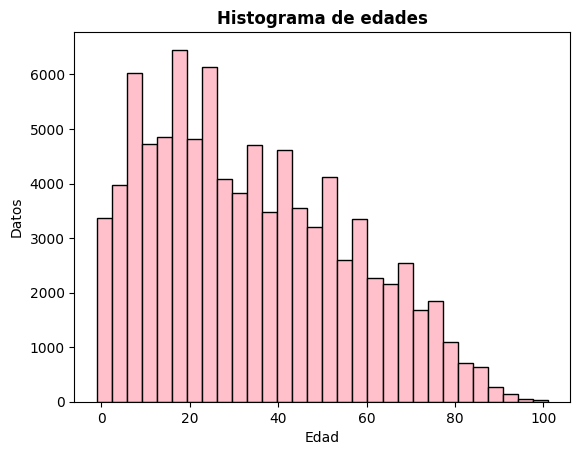

Los datos menores a 0 son 334
Esto representa un 0.36567074305608777% de los datos


In [19]:
# Observamos variables numéricas
# Observamos ch06 (edad)
plt.hist(df_completo["ch06"],bins=30, edgecolor='black', color='pink')
plt.xlabel('Edad')
plt.ylabel('Datos')
plt.title("Histograma de edades", fontweight="bold")
# Mostrar el gráfico
plt.show()

# Evaluamos datos negativos
print(f"Los datos menores a 0 son {len(df_completo[df_completo['ch06']<0])}")
print(f"Esto representa un {len(df_completo[df_completo['ch06']<0]) / len(df_completo)*100}% de los datos")

In [20]:
# filtramos valores negativos
df_completo = df_completo[df_completo['ch06']>0]

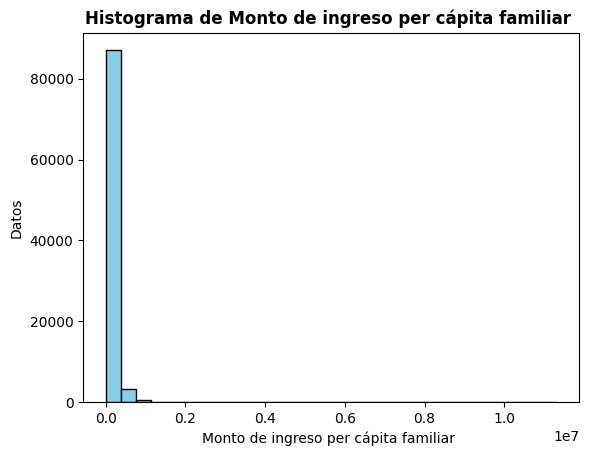

Los datos menores a 0 son 0
Esto representa un 0.0% de los datos


In [21]:
# Observamos variables numéricas
# Observamos ipcf (Monto de ingreso per cápita familiar )
plt.hist(df_completo["ipcf"],bins=30, edgecolor='black', color='skyblue')
plt.xlabel('Monto de ingreso per cápita familiar ')
plt.ylabel('Datos')
plt.title("Histograma de Monto de ingreso per cápita familiar ", fontweight="bold")
# Mostrar el gráfico
plt.show()

# Evaluamos datos negativos
print(f"Los datos menores a 0 son {len(df_completo[df_completo['ipcf']<0])}")
print(f"Esto representa un {len(df_completo[df_completo['ipcf']<0]) / len(df_completo)*100}% de los datos")

In [22]:
# Calculamos la media y el desvío estándar de 'ipcf'
media_ipcf = df_completo["ipcf"].mean()
desvio_ipcf = df_completo["ipcf"].std()
criterio = media_ipcf + 3 * desvio_ipcf

# Evaluamos datos extremos
print(f"Los datos mayores al criterio son {len(df_completo[df_completo['ipcf']>criterio])}")
print(f"Esto representa un {len(df_completo[df_completo['ipcf']>criterio]) / len(df_completo)*100}% de los datos")

# Filtramos los datos mayores a dos desvíos estándar por encima de la media
df_completo = df_completo[df_completo["ipcf"] < criterio]

Los datos mayores al criterio son 1134
Esto representa un 1.24608537992418% de los datos


In [23]:
len(df_completo)

89871

### Evaluamos datos faltantes y Ns. Nr.

In [24]:
# DATOS FALTANTES Y NS/NR

df_completo.isna().sum() #contamos NA

# evaluamos si en cada columnas hay datos clasificados como Ns/Nr
def evaluar_ns_nr(df):
    """
    Evalúa cada columna del DataFrame para verificar si hay algún valor 'Ns./Nr.'.
    """
    for columna in df.columns:
        if df[columna].isin(["Ns./Nr.", "NS./NR."]).any():
            print(f"La columna '{columna}' CONTIENE {len(df[df[columna] == 'Ns./Nr.'])} datos 'Ns./Nr.'.")
        else:
            print(f"La columna '{columna}' no contiene datos 'Ns./Nr.'.")

evaluar_ns_nr(df_completo)

La columna 'anio' no contiene datos 'Ns./Nr.'.
La columna 'ch04' no contiene datos 'Ns./Nr.'.
La columna 'ch06' no contiene datos 'Ns./Nr.'.
La columna 'ch07' CONTIENE 1 datos 'Ns./Nr.'.
La columna 'ch08' CONTIENE 134 datos 'Ns./Nr.'.
La columna 'ch09' CONTIENE 4 datos 'Ns./Nr.'.
La columna 'nivel_ed' no contiene datos 'Ns./Nr.'.
La columna 'estado' no contiene datos 'Ns./Nr.'.
La columna 'cat_inac' no contiene datos 'Ns./Nr.'.
La columna 'ipcf' no contiene datos 'Ns./Nr.'.


In [25]:
len(df_completo)

89871

In [26]:
# Datos Ns/Nr
# Contamos Ns/Nr y los eliminamos
cantidad_na_ch07 = df_completo[df_completo["ch07"] == "Ns./Nr."]
print(f"La cantidad de NA en ch07 es {len(cantidad_na_ch07)}")
total_ch07 = len(df_completo["ch07"])
print(f"La proporción de NA en ch07 es {len(cantidad_na_ch07)/total_ch07} \n")
df_completo = df_completo[df_completo["ch07"] != "Ns./Nr."]

cantidad_na_ch08 = df_completo[df_completo["ch08"] == "Ns./Nr."]
print(f"La cantidad de NA en ch08 es {len(cantidad_na_ch08)}")
total_ch08 = len(df_completo["ch08"])
print(f"La proporción de NA en ch08 es {len(cantidad_na_ch08)/total_ch08}\n")
df_completo = df_completo[df_completo["ch08"] != "Ns./Nr."]

cantidad_na_ch09 = df_completo[df_completo["ch09"] == "Ns./Nr."]
print(f"La cantidad de NA en ch09 es {len(cantidad_na_ch09)}")
total_ch09 = len(df_completo["ch09"])
print(f"La proporción de NA en ch09 es {len(cantidad_na_ch09)/total_ch09}\n")
df_completo = df_completo[df_completo["ch09"] != "Ns./Nr."]

La cantidad de NA en ch07 es 1
La proporción de NA en ch07 es 1.1127059896963425e-05 

La cantidad de NA en ch08 es 134
La proporción de NA en ch08 es 0.0014910426171136086

La cantidad de NA en ch09 es 3
La proporción de NA en ch09 es 3.343139876972452e-05



## c) Composición sexos

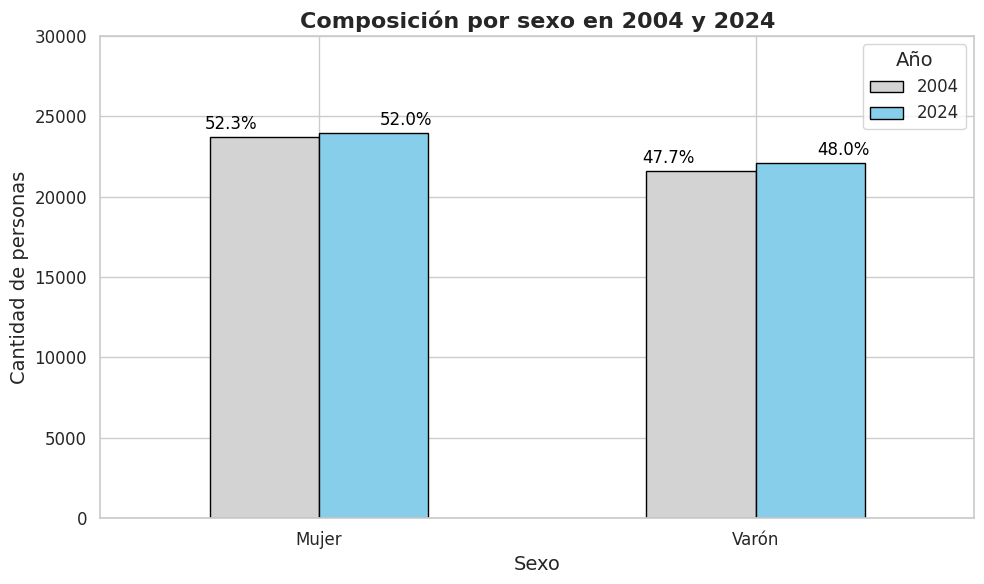

In [27]:
# Aplicar un estilo de Seaborn
sns.set(style="whitegrid")

# Contar la cantidad de cada sexo en 2004 y 2024
conteo_2004 = df_2004['ch04'].value_counts()
conteo_2024 = df_2024['ch04'].value_counts()

# Renombrar los índices: 1 -> 'Varón', 2 -> 'Mujer'
conteo_2024.index = conteo_2024.index.map({1: 'Varón', 2: 'Mujer'})

# Asegurarse de que los índices coincidan, llenando valores faltantes con 0
df_sexo = pd.DataFrame({'2004': conteo_2004, '2024': conteo_2024}).fillna(0)

# Calcular el total por año
total_2004 = df_sexo['2004'].sum()
total_2024 = df_sexo['2024'].sum()

# Calcular los porcentajes
porcentaje_2004 = (df_sexo['2004'] / total_2004) * 100
porcentaje_2024 = (df_sexo['2024'] / total_2024) * 100

# Hacemos el gráfico de barras
ax = df_sexo.plot(kind='bar', figsize=(10, 6), color=['lightgrey', 'skyblue'], edgecolor='black')

# Agregamos títulos y etiquetas
plt.title('Composición por sexo en 2004 y 2024', fontsize=16, weight='bold');
plt.ylabel('Cantidad de personas', fontsize=14, );
plt.xlabel('Sexo', fontsize=14);
plt.xticks(rotation=0, fontsize=12);
plt.yticks(fontsize=12);

# Establecer el límite máximo del eje Y para que quede más lindo
plt.ylim(0, 30000)

# Cambiamos el acceso a las posiciones usando iloc[] porque si uso [i] pandas se enoja
for i in range(len(df_sexo)):
    ax.text(i - 0.2, df_sexo.iloc[i]['2004'] + 500, f"{porcentaje_2004.iloc[i]:.1f}%", fontsize=12, color='black', ha='center')
    ax.text(i + 0.2, df_sexo.iloc[i]['2024'] + 500, f"{porcentaje_2024.iloc[i]:.1f}%", fontsize=12, color='black', ha='center')

# Añadir leyenda
plt.legend(title='Año', fontsize=12, title_fontsize=14);

# Ajustar el gráfico y mostrarlo
plt.tight_layout();
plt.show();

## d) Matriz de correlación

In [28]:
# Seleccionar las columnas de interés
variables_matriz = ['anio','ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']

# Filtrar las columnas en los DataFrames
df_completo_filtered = df_completo[variables_matriz]

# Copia para evitar advertencias
df_completo_filtered = df_completo_filtered.copy()

In [29]:
# Evaluamos contenido de las columnas (tipo de datos) con la función creada previamente
tipos_de_datos(df_completo_filtered)


 La columna 'anio' tiene un único tipo de datos;las variables son [2004 2024]

 La columna 'ch04' tiene un único tipo de datos;las variables son ['Varón' 'Mujer']

 La columna 'ch06' tiene un único tipo de datos;las variables son [ 79  67  74  54  51  25  20  55  48  17  15  77  50  49  26  22  18  86
  62  76  45  41  21  31  19  52  12  32  29  64  10  47  43  13   3  46
  78  60  59  37  44  30  63  71  87  34  14  24  28  27  69  56  33  66
  61   1  92  65  57  23   4  40  16   9  83   6  38  75  11  53  73  39
  35   7   5  36   8  82  85  72  70  89  42   2  58  68  81  80  93  96
  84  90  94  88  98  91  97  95  99 101 100]

 La columna 'ch07' tiene múltiples tipos de datos; las variables son ['Viudo' 'Separado o divorciado' 'Casado' 'Soltero' 'Unido' 9]

 La columna 'ch08' tiene un único tipo de datos;las variables son ['Obra social (incluye PAMI)' 'No paga ni le descuentan'
 'Mutual/Prepaga/Servicio de emergencia'
 'Obra social y mutual/prepaga/servicio de emergencia'
 'Pla

In [30]:
# Agrupamos categorías

############################################ ch08 - obra social ############################################
# Agrupar categorías de 'ch08'
df_completo_filtered['ch08'] = df_completo_filtered['ch08'].replace({'Obra social (incluye PAMI)': "Obra social"})

# Decidimos reducir a la categoría a mayor cobertura (si tiene OS y seguro público reducimos a OS)
df_completo_filtered['ch08'] = df_completo_filtered['ch08'].replace({'Obra social y mutual/prepaga/servicio de emergencia': "Obra social"})
df_completo_filtered['ch08'] = df_completo_filtered['ch08'].replace({'Obra social, mutual/prepaga/servicio de emergencia y planes' :"Obra social"})
df_completo_filtered['ch08'] = df_completo_filtered['ch08'].replace({'Obra social y planes y seguros públicos':"Obra social" })

############################################ ch07 - estado civil ############################################
# Agrupar categorías de 'ch07'
df_completo_filtered['ch07'] = df_completo_filtered['ch07'].replace({'Unido': "Casado o unido"})
df_completo_filtered['ch07'] = df_completo_filtered['ch07'].replace({'Casado': "Casado o unido"})
df_completo_filtered['ch07'] = df_completo_filtered['ch07'].replace({'Separado o divorciado': "Separado, divorciado o viudo"})
df_completo_filtered['ch07'] = df_completo_filtered['ch07'].replace({'Viudo': "Separado, divorciado o viudo"})

############################################ nivel_ed - nivel educativo ############################################
# Agrupar categorías de 'nivel_ed'
df_completo_filtered['nivel_ed'] = df_completo_filtered['nivel_ed'].replace({'Primaria Incompleta (incluye educación especial)': "Sin instrucción"})
df_completo_filtered['nivel_ed'] = df_completo_filtered['nivel_ed'].replace({'Primaria Incompleta': "Sin instrucción"})
df_completo_filtered['nivel_ed'] = df_completo_filtered['nivel_ed'].replace({"Secundaria Incompleta" :"Primaria Completa"})
df_completo_filtered['nivel_ed'] = df_completo_filtered['nivel_ed'].replace({"Superior Universitaria Incompleta":"Secundaria Completa" })


In [31]:
# Convertir variables binomiales y ordinales

############################################ ch04 - sexo ############################################
# Convertir la columna 'ch04' a dummy (0 para Varón (1), 1 para Mujer (2)) usando .loc[]
df_completo_filtered.loc[:, "ch04"] = df_completo_filtered["ch04"].replace({'Varón': 0, 'Mujer': 1})

############################################ ch07 - estado civil ############################################
# Ordenamos las categorías según nivel de emparejamiento
# Convertir la columna a numérica
df_completo_filtered.loc[:,'ch07'] = df_completo_filtered['ch07'].replace(
    {"Soltero":0,
     "Separado, divorciado o viudo":1,
     "Casado o unido": 2}
)
############################################ ch08 - obra social ############################################
# Ordenamos las categorías según nivel de cobertura
# Convertir la columna a numérica
df_completo_filtered.loc[:,'ch08'] = df_completo_filtered['ch08'].replace(
    {"No paga ni le descuentan":0,
    "Planes y seguros públicos":1,
    "Mutual/Prepaga/Servicio de emergencia":2,
    "Obra social":3}
)
############################################ nivel_ed - nivel educativo ############################################
# Convertir la columna 'nivel_ed' a numérica pq es ordinal
df_completo_filtered.loc[:,'nivel_ed'] = df_completo_filtered['nivel_ed'].replace({'Sin instrucción':0, 'Primaria Completa':1, 'Secundaria Completa':2 , 'Superior Universitaria Completa':3})

<ipython-input-31-0057a6790164>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_completo_filtered.loc[:, "ch04"] = df_completo_filtered["ch04"].replace({'Varón': 0, 'Mujer': 1})
<ipython-input-31-0057a6790164>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_completo_filtered.loc[:,'ch07'] = df_completo_filtered['ch07'].replace(
<ipython-input-31-0057a6790164>:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer

In [32]:
# Variables categóricas

# Filtrar los datos de 2004 y 2024
df_2004 = df_completo_filtered[df_completo_filtered['anio'] == 2004]
df_2024 = df_completo_filtered[df_completo_filtered['anio'] == 2024]

# Aplicar One-Hot Encoding a las columnas 'estado' y 'cat_inac' en cada conjunto de datos
df_2004_encoded = pd.get_dummies(df_2004, columns=['estado', 'cat_inac'], drop_first=True)
df_2024_encoded = pd.get_dummies(df_2024, columns=['estado', 'cat_inac'], drop_first=True)

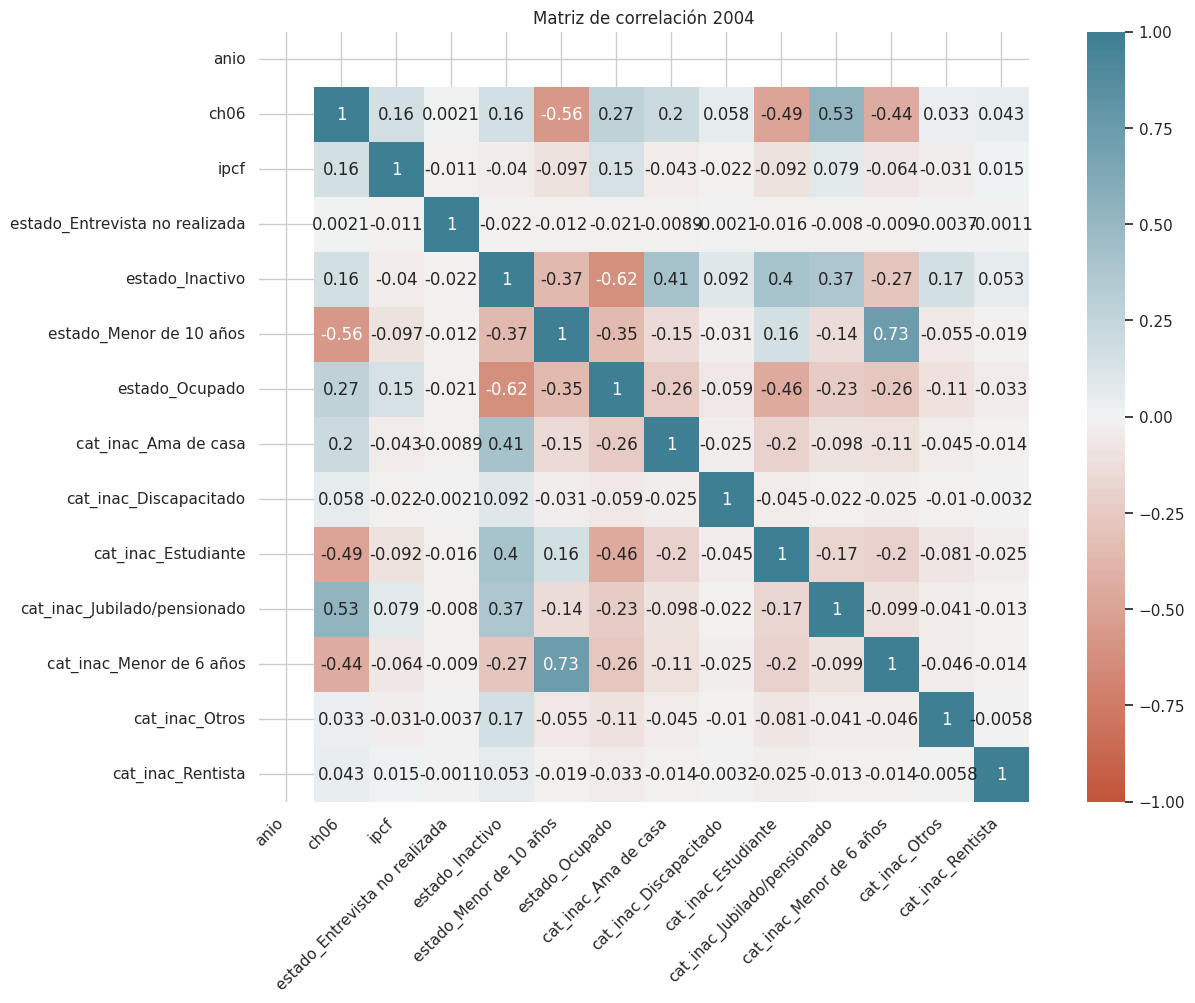

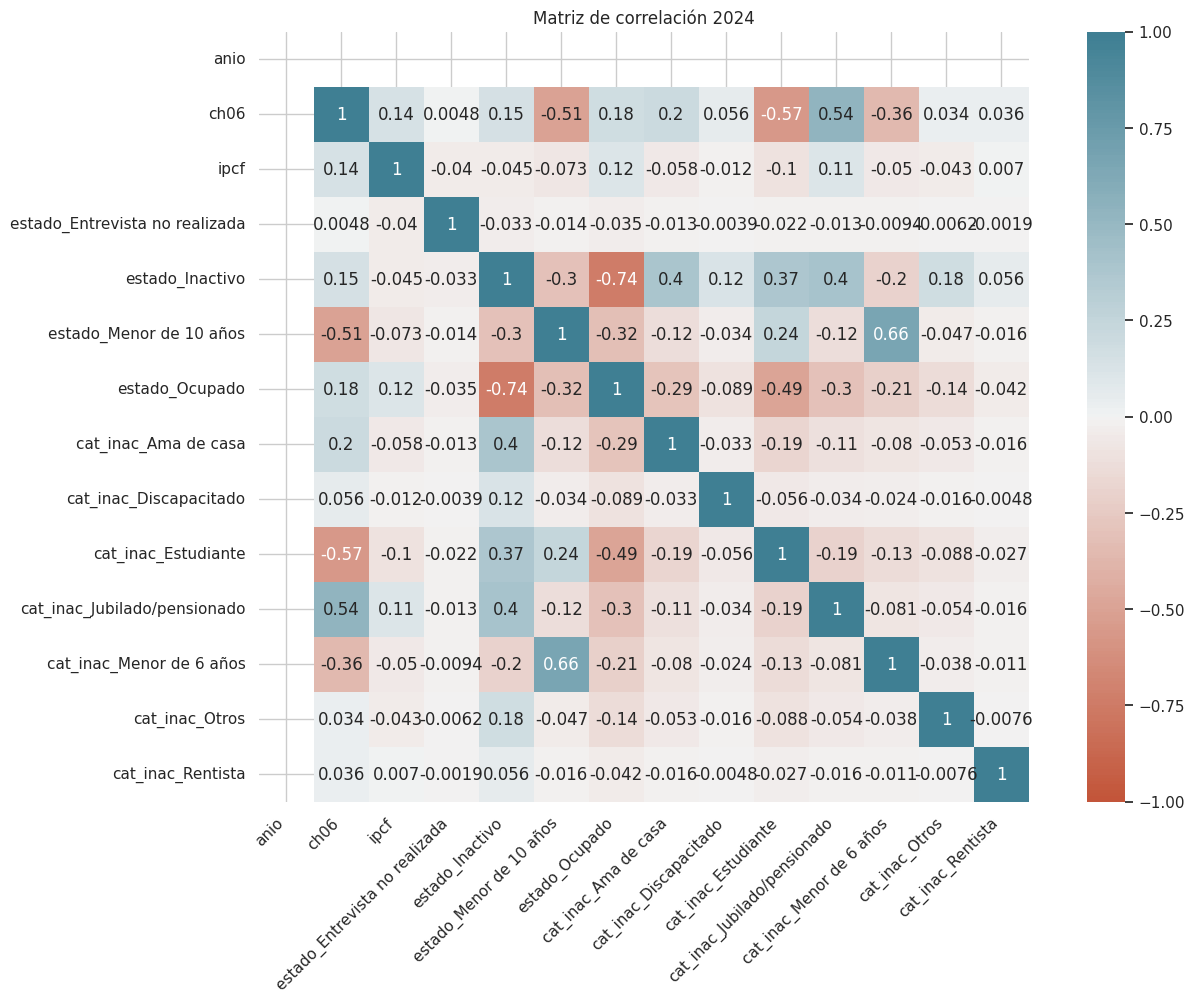

In [33]:
# Calcular la matriz de correlación
# Calcular la matriz de correlación para 2004 y 2024
corr_2004 = df_2004_encoded.corr(numeric_only=True)
corr_2024 = df_2024_encoded.corr(numeric_only=True)

# Crear un gráfico de calor para la correlación en 2004
plt.figure(figsize=(15, 10))
ax = sns.heatmap(
    corr_2004,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title('Matriz de correlación 2004')
plt.show()

# Crear un gráfico de calor para la correlación en 2024
plt.figure(figsize=(15, 10))
ax = sns.heatmap(
    corr_2024,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title('Matriz de correlación 2024')
plt.show()


## e) ¿Cuántos desocupados e inactivos hay en la muestra?  ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado?


In [127]:
# contamos la cantidad de desocupados
total = len(df_completo['estado'])
cantidad_desocupados = df_completo[df_completo['estado'] == 'Desocupado'].shape[0]
print (f"La cantidad de desocupados es {cantidad_desocupados}")
print (f"Esto representa un {round(cantidad_desocupados/total*100, 2)}% del total")
print("\n")

# contamos la cantidad de inactivos
cantidad_inactivos = df_completo[df_completo['estado'] == 'Inactivo'].shape[0]
print (f"La cantidad de inactivos es {cantidad_inactivos}")
print (f"Esto representa un {round(cantidad_inactivos/total*100, 2)}% del total")

La cantidad de desocupados es 4061
Esto representa un 4.53% del total


La cantidad de inactivos es 36096
Esto representa un 40.23% del total


In [128]:
# Media de ingreso per cápita familiar (IPCF) según estado

media = df_completo.groupby('estado')['ipcf'].mean().reset_index()
media = media.sort_values(by='ipcf', ascending=True)
print("La media de ingreso per cápita familiar (IPCF) según estado  es:")
media

La media de ingreso per cápita familiar (IPCF) según estado  es:


,estado,ipcf
1,Entrevista no realizada,34.492928
0,Desocupado,30007.465008
3,Menor de 10 años,43570.328151
2,Inactivo,65629.846407
4,Ocupado,81853.163418


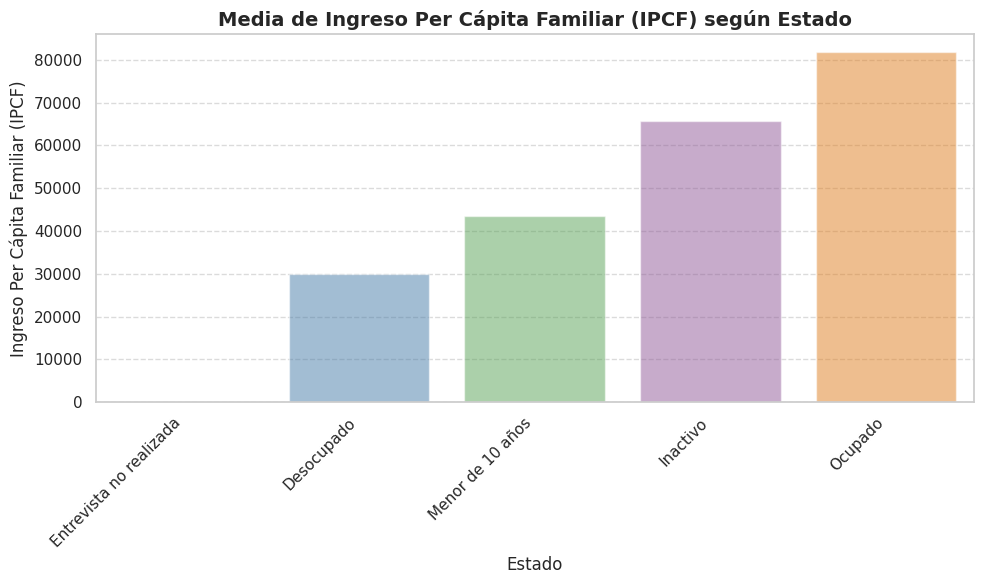

In [129]:
# Grafico de barras

plt.figure(figsize=(10, 6))
sns.barplot(x='estado', y="ipcf", data=media,  hue='estado', palette= "Set1", alpha = 0.5)

# Configuración del gráfico
plt.title('Media de Ingreso Per Cápita Familiar (IPCF) según Estado', fontsize=14, fontweight="bold")
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Ingreso Per Cápita Familiar (IPCF)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Ajustar el diseño para que no se solapen los elementos
plt.show()


## Ejercicio 3

In [130]:
df_completo["estado"].unique()

array(['Inactivo', 'Ocupado', 'Desocupado', 'Menor de 10 años',
       'Entrevista no realizada'], dtype=object)

In [131]:
cant_norespondieron = (df_completo["estado"] == "Entrevista no realizada").sum()
print(f"La cantidad de sujetos que no respondieron es {cant_norespondieron}")

La cantidad de sujetos que no respondieron es 101


In [132]:
# Creamos nuevos df
respondieron = df_completo[df_completo["estado"] != "Entrevista no realizada"].copy()
norespondieron = df_completo[df_completo["estado"] == "Entrevista no realizada"].copy()

In [133]:
# Evaluar los df
# respondieron
valores_unicosr = respondieron["estado"].unique()
print("Valores únicos de respondieron en la columna 'estado':", valores_unicosr)
print("\n")

# No respondieron
valores_unicosnr = norespondieron["estado"].unique()
print("Valores únicos de norespondieron> en la columna 'estado':", valores_unicosnr)
print("\n")

# Contar la cantidad de cada categoría en respondieron
conteo_estados = respondieron["estado"].value_counts()
print("Cantidad de cada estado: \n", conteo_estados)

Valores únicos de respondieron en la columna 'estado': ['Inactivo' 'Ocupado' 'Desocupado' 'Menor de 10 años']


Valores únicos de norespondieron> en la columna 'estado': ['Entrevista no realizada']


Cantidad de cada estado: 
 estado
Ocupado             36495
Inactivo            36096
Menor de 10 años    12980
Desocupado           4061
Name: count, dtype: int64


## Ejercicio 4


In [134]:
#Creamos columna PEA (Población Económicamente Activa)
respondieron["PEA"] = respondieron["estado"].apply(lambda x: 1 if x in ["Ocupado", "Desocupado"] else 0)
respondieron["PEA"].unique()

array([0, 1])

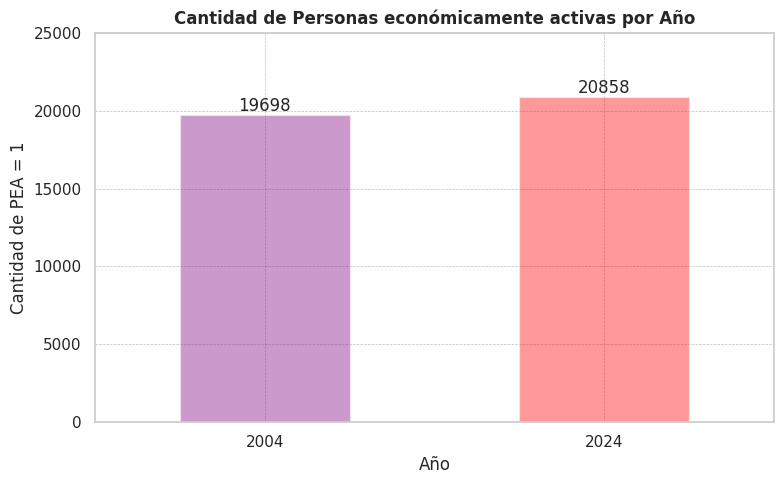

In [135]:
# Agrupar por año y sumar la columna 'PEA'
cant = respondieron.groupby("anio")["PEA"].sum()

# Configuración del gráfico
plt.figure(figsize=(8, 5))
bars = cant.plot(kind='bar', color=['purple', 'red'], alpha=0.4)
plt.title('Cantidad de Personas económicamente activas por Año', fontweight="bold")
plt.xlabel('Año')
plt.ylabel('Cantidad de PEA = 1')
plt.ylim(0, 25000)
plt.xticks(rotation=0)
plt.grid(linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Etiquetas de cantidad
for bar in bars.patches:
    plt.annotate(bar.get_height(),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom')

# Ajustar el diseño
plt.tight_layout()
plt.show()


##Ejericio 5

In [136]:
respondieron["ch06"].unique()

array([ 79,  67,  74,  54,  51,  25,  20,  55,  48,  17,  15,  77,  50,
        49,  26,  22,  18,  86,  62,  76,  45,  41,  21,  31,  19,  52,
        12,  32,  29,  64,  10,  47,  43,  13,   3,  46,  78,  60,  59,
        37,  44,  30,  63,  71,  87,  34,  14,  24,  28,  27,  69,  56,
        33,  66,  61,   1,  92,  65,  57,  23,   4,  40,  16,   9,  83,
         6,  38,  75,  11,  53,  73,  39,  35,   7,   5,  36,   8,  82,
        85,  72,  70,  89,  42,   2,  58,  68,  81,  80,  93,  96,  84,
        90,  94,  88,  98,  91,  97,  95,  99, 101, 100])

In [137]:
# Convertimos todos los valores de "CH06" a numéricos
respondieron["ch06"] = respondieron["ch06"].replace({"Menos de 1 año": 1, "98 y más años": 98})  # Reemplazamos el string "Menos de 1 año" por 1 y "98 y más años" por 98

# Convertimos la columna a numérica para asegurar la consistencia de los datos
respondieron["ch06"] = respondieron["ch06"].astype(int)

In [138]:
# Identificamos que hay valores negativos de edad y lo eliminamos
edades_negativas = respondieron[respondieron["ch06"] < 0]
print(f"Se encontraron {len(edades_negativas)} valores negativos en edad")

# Filtramos filas donde los valores en 'ch06' son mayores o iguales a cero
respondieron = respondieron[respondieron["ch06"] >= 0]
print(f"Luego del filtrado se encontraron {len(edades_negativas)} valores negativos en edad")

Se encontraron 0 valores negativos en edad
Luego del filtrado se encontraron 0 valores negativos en edad


In [139]:
# Columna PET (Población en Edad para Trabajar) que tome 1 si están la persona tiene entre 15 y 65 años
respondieron["PET"] = ((respondieron["ch06"] >= 15) & (respondieron["ch06"] <= 65)).astype(int)

cantidad_adultos = respondieron["PET"].sum()
print(f"La cantidad de personas que tienen entre 15 y 65 es: {cantidad_adultos}")

La cantidad de personas que tienen entre 15 y 65 es: 59215


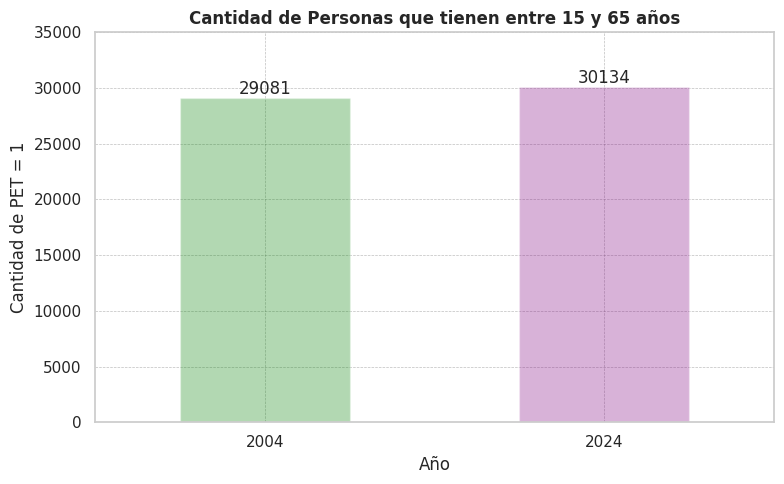

In [140]:
# Graficamos
cant_trabajo_año = respondieron.groupby("anio")["PET"].sum()

plt.figure(figsize=(8, 5))
bars = cant_trabajo_año.plot(kind='bar', color=['green', 'purple'], alpha=0.3)
plt.title('Cantidad de Personas que tienen entre 15 y 65 años', fontweight = "bold")
plt.xlabel('Año')
plt.ylabel('Cantidad de PET = 1')
plt.ylim(0, 35000)
plt.xticks(rotation=0)
plt.grid(linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Etiquetas de cantidad
for bar in bars.patches:
    plt.annotate(bar.get_height(),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

##Ejercicio 6

In [141]:
# Columna llamada "desocupado"
respondieron["desocupado"] = (respondieron["estado"] == "Desocupado").astype(int)
respondieron["desocupado"].unique()

# Filtramos el DataFrame por año y sumamos los valores de la columna 'desocupado'
desocupados_2004 = respondieron[respondieron["anio"] == 2004]["desocupado"].sum()
desocupados_2024 = respondieron[respondieron["anio"] == 2024]["desocupado"].sum()

print(f"Cantidad de personas desocupadas en 2004: {desocupados_2004}")
print(f"Cantidad de personas desocupadas en 2024: {desocupados_2024}")

Cantidad de personas desocupadas en 2004: 2713
Cantidad de personas desocupadas en 2024: 1348


In [142]:
# Proporción de desocupados por nivel educativo en el TOTAL de datos
# Cantidad de desocupados por nivel educativo
desocupados_por_ed = respondieron.groupby("nivel_ed")["desocupado"].sum()
print(f"La canrtidad de desocupados por nivel educativo es:{desocupados_por_ed.sum()} \n")

# Ordenamos de menor a mayor
desocupados_por_ed = desocupados_por_ed.sort_values(ascending=True)

# Cantidad total por nivel educativo
total_por_ed = respondieron.groupby("nivel_ed")["desocupado"].count()

# Proporción de desocupados por nivel educativo
proporcion_desocupados = desocupados_por_ed / total_por_ed

# Ordenamos de menor a mayor
proporcion_desocupados = proporcion_desocupados.sort_values(ascending=True)

# Imprimir resultados
print(f"La cantidad de desocupados por nivel educativo es:\n{desocupados_por_ed}\n")
print(f"La proporción de desocupados por nivel educativo es:\n{proporcion_desocupados}\n")

La canrtidad de desocupados por nivel educativo es:4061 

La cantidad de desocupados por nivel educativo es:
nivel_ed
Sin instrucción                        13
Primaria Incompleta                   243
Superior Universitaria Completa       319
Primaria Completa                     687
Superior Universitaria Incompleta     780
Secundaria Incompleta                 913
Secundaria Completa                  1106
Name: desocupado, dtype: int64

La proporción de desocupados por nivel educativo es:
nivel_ed
Sin instrucción                      0.001768
Primaria Incompleta                  0.015596
Superior Universitaria Completa      0.034475
Primaria Completa                    0.050234
Secundaria Incompleta                0.051620
Secundaria Completa                  0.070316
Superior Universitaria Incompleta    0.075348
Name: desocupado, dtype: float64



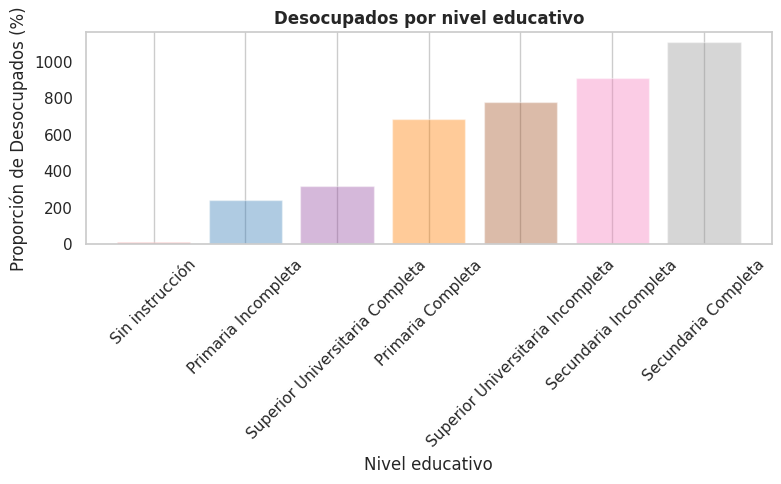

In [143]:
# Gráfico de proporción de desocupados por nivel educativo
plt.figure(figsize=(8, 5))

# Crear colores para cada nivel educativo usando una paleta de colores
colores = plt.cm.Set1(np.linspace(0, 1, len(desocupados_por_ed)))

# Graficar la cantidad de desocupados por nivel educativo
plt.bar(desocupados_por_ed.index, desocupados_por_ed.values, color=colores, alpha=0.4)
plt.title("Desocupados por nivel educativo", fontweight="bold")
plt.xlabel("Nivel educativo")
plt.ylabel("Proporción de Desocupados (%)")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [144]:
# Agrupar por año y nivel educativo
desocupados_por_ed_anio = respondieron.groupby(['anio', 'nivel_ed'])['desocupado'].sum().unstack(fill_value=0)
total_por_ed_anio = respondieron.groupby(['anio', 'nivel_ed'])['desocupado'].count().unstack(fill_value=0)

# Proporción de desocupados por nivel educativo
proporcion_desocupados_anio = desocupados_por_ed_anio.div(total_por_ed_anio)

# Imprimir resultados en formato legible
print("Cantidad de desocupados por nivel educativo:")
print(desocupados_por_ed_anio.to_string(), "\n")

print("Proporción de desocupados por nivel educativo:")
print(proporcion_desocupados_anio.to_string(), "\n")

Cantidad de desocupados por nivel educativo:
nivel_ed  Primaria Completa  Primaria Incompleta  Secundaria Completa  Secundaria Incompleta  Sin instrucción  Superior Universitaria Completa  Superior Universitaria Incompleta
anio                                                                                                                                                                             
2004                    567                  202                  609                    594               13                              181                                547
2024                    120                   41                  497                    319                0                              138                                233 

Proporción de desocupados por nivel educativo:
nivel_ed  Primaria Completa  Primaria Incompleta  Secundaria Completa  Secundaria Incompleta  Sin instrucción  Superior Universitaria Completa  Superior Universitaria Incompleta
anio            

<Figure size 1200x600 with 0 Axes>

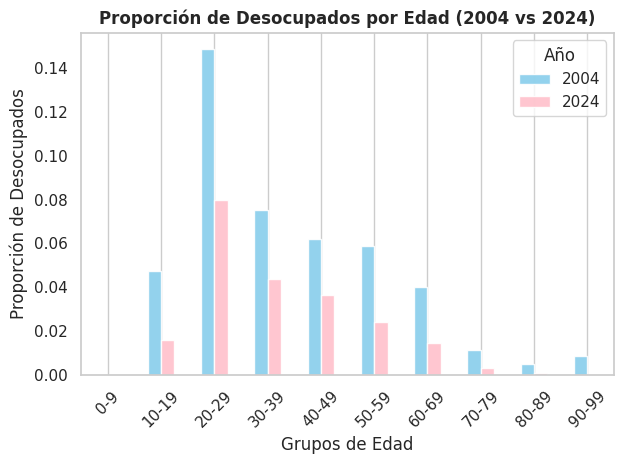



Cantidad de desocupados por año y grupo de edad:
 anio  Desocupados 0-9  Desocupados 10-19  Desocupados 20-29  Desocupados 30-39  Desocupados 40-49  Desocupados 50-59  Desocupados 60-69  Desocupados 70-79  Desocupados 80-89  Desocupados 90-99
 2004                0                414               1166                418                316                254                117                 23                  4                  1
 2024                0                115                555                272                221                114                 61                  9                  1                  0



Proporción de desocupados por año y grupo de edad:
 anio  Proporción 0-9  Proporción 10-19  Proporción 20-29  Proporción 30-39  Proporción 40-49  Proporción 50-59  Proporción 60-69  Proporción 70-79  Proporción 80-89  Proporción 90-99
 2004             0.0          0.047450          0.148478          0.075112          0.061924          0.059015          0.040110

In [145]:
# Crear intervalos de 0 a 100 en pasos de 10
bins = range(0, 101, 10);
labels = [f"{i}-{i+9}" for i in bins[:-1]]  # Etiquetas para los grupos de edad

# Creamos la nueva columna con los grupos de edad
respondieron["edad_cada10"] = pd.cut(respondieron["ch06"], bins=bins, labels=labels, right=False)

# Cantidad de desocupados por año y grupos de edad
cantidad_desocupados3 = respondieron.groupby(["anio", "edad_cada10"], observed=True)["desocupado"].sum().unstack()

# Cantidad total por año y grupo de edad
total_por_edad = respondieron.groupby(["anio", "edad_cada10"], observed=True)["desocupado"].count().unstack()

# Proporción de desocupados por grupo de edad
proporcion_desocupados = cantidad_desocupados3 / total_por_edad
proporcion_desocupados = proporcion_desocupados.fillna(0)  # Llenar NaN con 0 para evitar problemas en el gráfico

# Convertir en DataFrames más descriptivos
cantidad_desocupados_df = pd.DataFrame(cantidad_desocupados3).reset_index()
cantidad_desocupados_df.columns.name = 'Año'
cantidad_desocupados_df.rename(columns={c: f'Desocupados {c}' for c in cantidad_desocupados_df.columns[1:]}, inplace=True)

proporcion_desocupados_df = pd.DataFrame(proporcion_desocupados).reset_index()
proporcion_desocupados_df.columns.name = 'Año'
proporcion_desocupados_df.rename(columns={c: f'Proporción {c}' for c in proporcion_desocupados_df.columns[1:]}, inplace=True)

# Graficar la proporción de desocupados
plt.figure(figsize=(12, 6));
proporcion_desocupados.T.plot(kind='bar', color=["skyblue", "pink"], alpha=0.9)
plt.title("Proporción de Desocupados por Edad (2004 vs 2024)", fontweight="bold")
plt.xlabel("Grupos de Edad")
plt.ylabel("Proporción de Desocupados")
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.grid(axis='y')
plt.tight_layout();
plt.show();
print("\n")

# Imprimir resultados
print("Cantidad de desocupados por año y grupo de edad:")
print(cantidad_desocupados_df.to_string(index=False))
print("\n")

print("\nProporción de desocupados por año y grupo de edad:")
print(proporcion_desocupados_df.to_string(index=False))
print("\n")

# Parte II: Clasificación

## Ejercicio 1


In [146]:
# Importamos librerias
from sklearn.model_selection import train_test_split

In [147]:
# Eliminamos columnas que no son relevantes
variables_calsific = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf', "anio", "desocupado"]
respondieron_clasific = respondieron[variables_calsific].copy()
respondieron_clasific  = respondieron_clasific .reset_index(drop=True)

In [148]:
# Calculo cantidad de datos faltantes
respondieron_clasific .isna().sum()

,0
ch04,0
ch06,0
ch07,0
ch08,0
nivel_ed,0
estado,0
cat_inac,0
ipcf,0
anio,0
desocupado,0


In [149]:
respondieron_clasific

,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,anio,desocupado
0,Varón,79,Viudo,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,Jubilado/pensionado,368.0,2004,0
1,Mujer,67,Separado o divorciado,No paga ni le descuentan,Primaria Completa,Ocupado,0.0,0.0,2004,0
2,Mujer,74,Viudo,Obra social (incluye PAMI),Primaria Completa,Inactivo,Jubilado/pensionado,440.0,2004,0
3,Varón,54,Casado,Mutual/Prepaga/Servicio de emergencia,Primaria Completa,Ocupado,0.0,532.5,2004,0
4,Mujer,51,Casado,Mutual/Prepaga/Servicio de emergencia,Superior Universitaria Completa,Inactivo,Ama de casa,532.5,2004,0
...,...,...,...,...,...,...,...,...,...,...
89627,Mujer,68,Casado,Obra social (incluye PAMI),Superior Universitaria Completa,Inactivo,Jubilado/pensionado,0.0,2024,0
89628,Varón,63,Casado,Obra social (incluye PAMI),Secundaria Completa,Desocupado,0,0.0,2024,1
89629,Varón,33,Soltero,Obra social (incluye PAMI),Superior Universitaria Completa,Ocupado,0,0.0,2024,0
89630,Mujer,33,Soltero,Obra social (incluye PAMI),Superior Universitaria Completa,Ocupado,0,0.0,2024,0


In [150]:
# Mapeamos las variables con distintos tipos de datos

# Mapeo para la columna "ch04" (Sexo)
ch04_mapping = {
    "Varón": 0,
    "Mujer": 1
}
respondieron_clasific["ch04"] = respondieron_clasific["ch04"].replace(ch04_mapping)

# Mapeo para la columna "ch07" (Estado civil)
ch07_mapping = {
    "Unido": 1,
    "Casado": 2,
    "Separado o divorciado": 3,
    "Viudo": 4,
    "Soltero": 5
}
respondieron_clasific["ch07"] = respondieron_clasific["ch07"].replace(ch07_mapping)

# Mapeo para la columna "ch08" (Cobertura médica)
ch08_mapping = {
    "Obra social (incluye PAMI)": 1,
    "Mutual/Prepaga/Servicio de emergencia": 2,
    "Planes y seguros públicos": 3,
    "No paga ni le descuentan": 4,
    "Ns./Nr.": 9,
    "Obra social y mutual/prepaga/servicio de emergencia": 12,
    "Obra social y planes y seguros públicos": 13,
    "Mutual/prepaga/servicio de emergencia/planes y seguros públicos": 23,
    "Mutual/prepaga/servicio de emergencia/planes y seguros públi": 23,
    "Obra social, mutual/prepaga/servicio de emergencia y planes": 123
}
respondieron_clasific["ch08"] = respondieron_clasific["ch08"].replace(ch08_mapping)

# Reemplazar los valores que comienzan con "Entrevista individual no realizada"
respondieron_clasific['estado'] = respondieron_clasific['estado'].replace(
    'Entrevista individual no realizada (no respuesta al cuestion', 'Entrevista no realizada'
)

# Mapeo para la columna "estado" (Condición de actividad)
estado_mapping = {
    "Entrevista no realizada": 0,
    "Ocupado": 1,
    "Desocupado": 2,
    "Inactivo": 3,
    "Menor de 10 años": 4
}
respondieron_clasific["estado"] = respondieron_clasific["estado"].replace(estado_mapping)

# Mapeo para la columna "cat_inac" (Categoría de inactividad)
cat_inac_mapping = {
    "Jubilado/pensionado": 1,
    "Rentista": 2,
    "Estudiante": 3,
    "Ama de casa": 4,
    "Menor de 6 años": 5,
    "Discapacitado": 6,
    "Otros": 7
}
respondieron_clasific["cat_inac"] = respondieron_clasific["cat_inac"].replace(cat_inac_mapping)

# Mapeo para la columna "nivel_ed" (Nivel educativo)
# Modificamos categoría para simplificar
respondieron_clasific.loc[
    respondieron_clasific['nivel_ed'] == 'Primaria Incompleta (incluye educación especial)', 'nivel_ed'
] = 'Primaria Incompleta'

# Modificamos la columna 'nivel_ed'
respondieron_clasific['nivel_ed'] = respondieron_clasific['nivel_ed'].replace({
    'Primaria Incompleta': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Sin instrucción': 7
})

# Convertimos todos los valores de "CH06" a numéricos
respondieron_clasific["ch06"] = respondieron_clasific["ch06"].replace({
    "Menos de 1 año": 1,
    "98 y más años": 98
})  # Reemplazamos el string "Menos de 1 año" por 1 y "98 y más años" por 98

# Convertimos la columna a numérica para asegurar la consistencia de los datos
respondieron_clasific["ch06"] = respondieron_clasific["ch06"].astype(int)


<ipython-input-150-e8036a88554e>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  respondieron_clasific["ch04"] = respondieron_clasific["ch04"].replace(ch04_mapping)
<ipython-input-150-e8036a88554e>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  respondieron_clasific["ch07"] = respondieron_clasific["ch07"].replace(ch07_mapping)
<ipython-input-150-e8036a88554e>:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_obje

In [151]:
print(respondieron_clasific.index.duplicated().sum())

0


In [152]:
# Partimos la base "respondieron_clasific" año 2004

respondieron_2004 = respondieron_clasific[respondieron_clasific["anio"] == 2004]

# Separar la variable dependiente
y = respondieron_2004['desocupado']
X = respondieron_2004.drop(columns=['desocupado'])

# Agregar la columna de unos para el intercepto en X
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Dividir en entrenamiento (70%) y prueba (30%) con semilla 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Verificamos que se cumplan dimensiones

cantidad_total = X.shape[0]
cantidad_train = X_train.shape[0]
cantidad_test = X_test.shape[0]

print(f"Proporción entrenamiento 2004: {round(cantidad_train / cantidad_total, 2)*100}%")
print(f"Proporción prueba 2004: {round(cantidad_test  / cantidad_total, 2)*100}%")


Proporción entrenamiento 2004: 70.0%
Proporción prueba 2004: 30.0%


In [153]:
# Partimos la base "respondieron" año 2024

respondieron_2024 = respondieron_clasific[respondieron_clasific["anio"] == 2024]

# Separar la variable dependiente
y2 = respondieron_2024['desocupado']
X2 = respondieron_2024.drop(columns=['desocupado'])

# Agregar la columna de unos para el intercepto en X
X2 = np.hstack((np.ones((X2.shape[0], 1)), X2))

# Dividir en entrenamiento (70%) y prueba (30%) con semilla 101
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=101)

# Verificamos que se cumplan dimensiones

cantidad_total2 = X2.shape[0]
cantidad_train2 = X_train2.shape[0]
cantidad_test2 = X_test2.shape[0]

print(f"Proporción entrenamiento 2024: {round(cantidad_train2 / cantidad_total2, 2)*100}%")
print(f"Proporción prueba 2024: {round(cantidad_test2  / cantidad_total2, 2)*100}%")

Proporción entrenamiento 2024: 70.0%
Proporción prueba 2024: 30.0%


In [154]:
respondieron.describe()

,anio,ch06,ipcf,PEA,PET,desocupado
count,89632.000000,89632.000000,89632.000000,89632.000000,89632.000000,89632.000000
mean,2013.919448,33.834278,67426.915718,0.452472,0.660646,0.045307
std,9.999731,22.045541,115174.715153,0.497739,0.473493,0.207979
min,2004.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,15.000000,100.000000,0.000000,0.000000,0.000000
50%,2004.000000,30.000000,350.000000,0.000000,1.000000,0.000000
75%,2024.000000,50.000000,105333.330000,1.000000,1.000000,0.000000
max,2024.000000,101.000000,635000.000000,1.000000,1.000000,1.000000


## Ejercicio 2

In [155]:
# Importamos librerias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

### Resgresion logística

In [156]:
# Regresion logística 2004
# Crear el modelo de regresión logística
modelo04 = LogisticRegression(penalty=None).fit(X_train, y_train) # Aumenta el número de iteraciones si es necesario

# Hacer predicciones en el conjunto de prueba
y_pred_prob = modelo04.predict_proba(X_test)[:,1]  # Probabilidades para la clase positiva

# Convertimos las probabilidades en Y con valores 1 o 0 (usando el clasificador de Bayes)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Directamente asigna 1 o 0 en función del umbral de 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de confusión:
[[12615   110]
 [  294   535]]


Accuracy: 0.9701933008705917


AUC: 0.989
Thresholds: [inf  1.  1. ...  0.  0.  0.]
FPR: [0.         0.00047151 0.0005501  ... 0.98035363 0.98051081 1.        ]
TPR: [0. 0. 0. ... 1. 1. 1.]


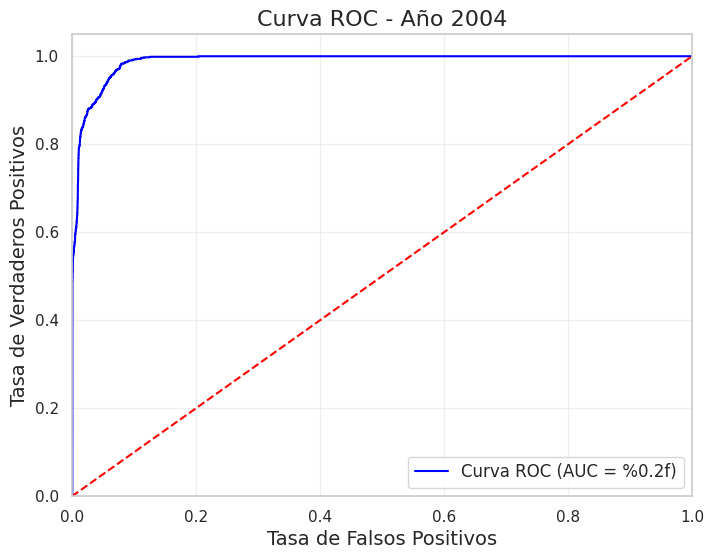

Área bajo la curva (AUC): 0.99


In [157]:
# Evaluar el modelo

# Matriz confusion
matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz_confusion)
print ("\n")
print('Accuracy:', accuracy_score(y_test, y_pred))
print ("\n")

# Nota importante: en Python la matriz de confusión tiene:
# en las filas los valores ciertos
# y en las columnas los valores predichos

# Calcular la curva ROC y el AUC
curvaauc = roc_auc_score(y_test, y_pred_prob)
print('AUC: %.3f' % curvaauc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
np.set_printoptions(suppress = True)
print('Thresholds:', thresholds)
print('FPR:', fpr)
print('TPR:', tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = %0.2f)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
plt.title('Curva ROC - Año 2004', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show();

# Reportar el AUC
print(f"Área bajo la curva (AUC): {curvaauc:.2f}")

In [158]:
# Regresion logística 2024
# Crear el modelo de regresión logística
modelo24 = LogisticRegression(penalty=None).fit(X_train2, y_train2) # Aumenta el número de iteraciones si es necesario

# Hacer predicciones en el conjunto de prueba
y_pred_prob2 = modelo04.predict_proba(X_test2)[:,1]  # Probabilidades para la clase positiva

# Convertimos las probabilidades en Y con valores 1 o 0 (usando el clasificador de Bayes)
y_pred2 = np.where(y_pred_prob2 > 0.5, 1, 0)  # Directamente asigna 1 o 0 en función del umbral de 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de confusión:
[[12901    13]
 [  346    77]]


Accuracy: 0.9730824023393567


AUC: 0.636


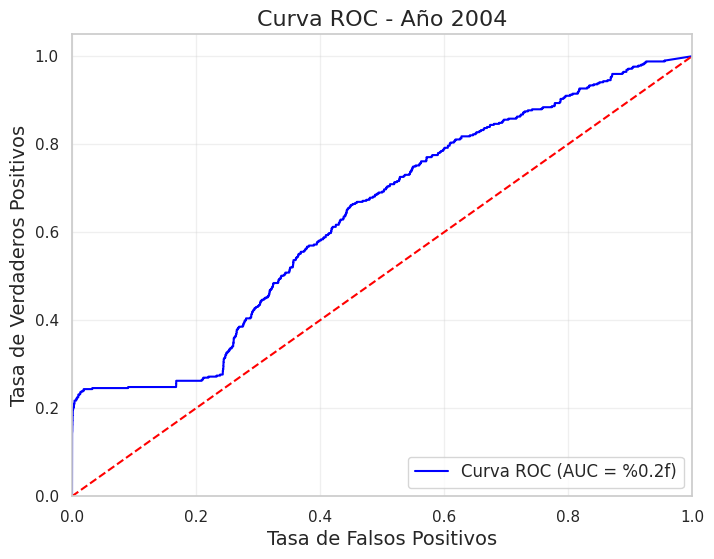

Área bajo la curva (AUC): 0.64


In [159]:
# Evaluar el modelo

# Matriz confusion
matriz_confusion2 = confusion_matrix(y_test2, y_pred2)
print("Matriz de confusión:")
print(matriz_confusion2)
print ("\n")
print('Accuracy:', accuracy_score(y_test2, y_pred2))
print ("\n")

# Nota importante: en Python la matriz de confusión tiene:
# en las filas los valores ciertos
# y en las columnas los valores predichos

# Calcular la curva ROC y el AUC
curvaauc2 = roc_auc_score(y_test2, y_pred_prob2)
print('AUC: %.3f' % curvaauc2)

fpr2, tpr2, thresholds2 = roc_curve(y_test2, y_pred_prob2)
np.set_printoptions(suppress = True)
#print('Thresholds:', thresholds2)
#print('FPR:', fpr2)
#print('TPR:', tpr2)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='blue', label='Curva ROC (AUC = %0.2f)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
plt.title('Curva ROC - Año 2004', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show();

# Reportar el AUC
print(f"Área bajo la curva (AUC): {curvaauc2:.2f}")

###Análisis discriminante lineal

In [160]:
# Analisis discriminante lineal 2004
lda_model_04 = LinearDiscriminantAnalysis(n_components=1) # Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
lda_model_04 = lda_model_04.fit(X_train, y_train)

y_test_pred_lda = lda_model_04.predict(X_test)

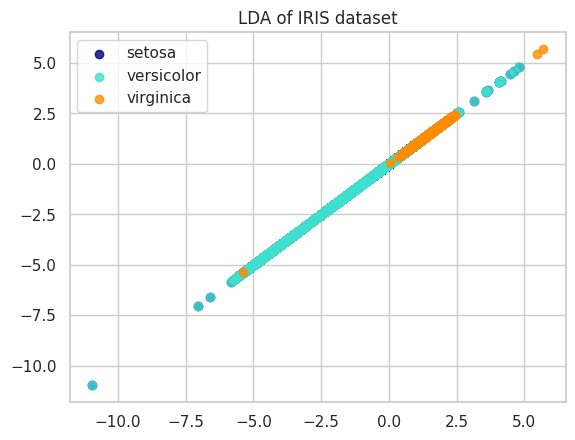

In [161]:
plt.figure()
X_r = lda_model_04.transform(X_train)
# Graficar los puntos de cada clase.
#Se toman las coordenadas de la primera y segunda columna de X_r, indexando los valores según y, la clase.
plt.scatter(X_r[y_train == 0, -1], X_r[y_train == 0, 0], alpha=.8, color='navy', label='setosa')
plt.scatter(X_r[y_train == 0, -1], X_r[y_train == 0, 0], alpha=.8, color='turquoise', label='versicolor')
plt.scatter(X_r[y_train == 1, -1], X_r[y_train == 1, 0], alpha=.8, color='darkorange', label='virginica')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

La accuracy del modelo es: 0.94
Matriz de confusión:
[[12717   825]
 [    8     4]]


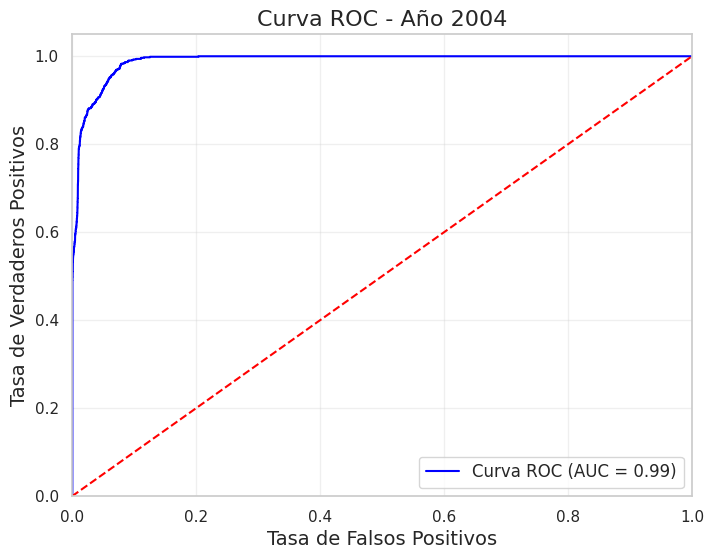

Área bajo la curva (AUC): 0.99


In [162]:
# Evaluar el modelo
accuracy_adl_04 = accuracy_score(y_test, y_test_pred_lda)
print("La accuracy del modelo es: %.2f" %accuracy_adl_04)
matriz_adl_04 = confusion_matrix(y_test_pred_lda,y_test)
print("Matriz de confusión:")
print(matriz_adl_04)

# Calcular la curva ROC y el AUC
fpr_adl_04, tpr_adl_04, thresholds_adl_04 = roc_curve(y_test, y_pred_prob)
roc_auc_adl_04 = auc(fpr_adl_04, tpr_adl_04)


# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_adl_04, tpr_adl_04, color='blue', label='Curva ROC (AUC = %0.2f)' % roc_auc_adl_04)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
plt.title('Curva ROC - Año 2004', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Reportar el AUC
print(f"Área bajo la curva (AUC): {roc_auc_adl_04:.2f}")

Precisión del modelo: 0.97
Matriz de confusión:
[[12898    16]
 [  421     2]]


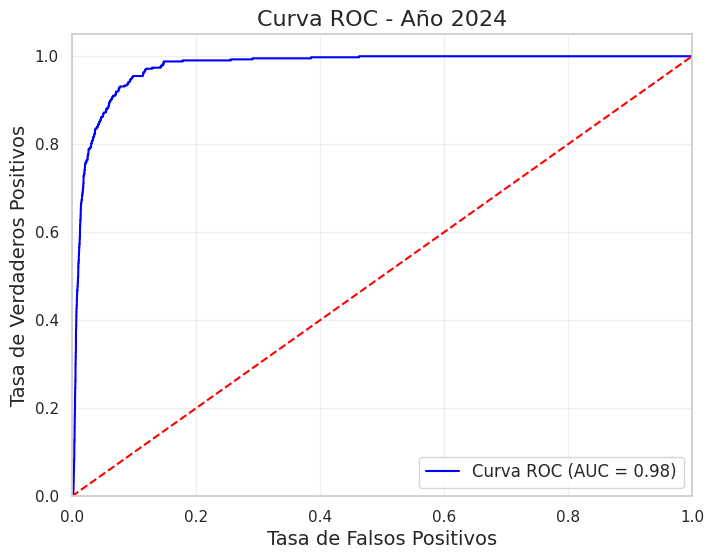

Área bajo la curva (AUC): 0.98


In [163]:
#Analisis Discriminante lineal 2024

# Crear el modelo de Análisis Discriminante Lineal
lda_model_24 = LDA()

# Ajustar el modelo con los datos de entrenamiento
lda_model_24.fit(X_train2, y_train2)

# Hacer predicciones en el conjunto de prueba
y_pred2 = lda_model_24.predict(X_test2)
y_pred_prob2 = lda_model_24.predict_proba(X_test2)[:, 1]  # Probabilidades para la clase positiva

# Evaluar el modelo
accuracy_adl_24 = accuracy_score(y_test2, y_pred2)
confusion_adl_24 = confusion_matrix(y_test2, y_pred2)

# Calcular la curva ROC y el AUC
fpr_adl_24, tpr_adl_24, thresholds_adl_24 = roc_curve(y_test2, y_pred_prob2)
roc_auc_adl_24 = auc(fpr_adl_24, tpr_adl_24)

# Reportar resultados
print(f"Precisión del modelo: {accuracy_adl_24:.2f}")
print("Matriz de confusión:")
print(confusion_adl_24)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_adl_24, tpr_adl_24, color='blue', label='Curva ROC (AUC = %0.2f)' % roc_auc_adl_24)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
plt.title('Curva ROC - Año 2024', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Reportar el AUC
print(f"Área bajo la curva (AUC): {roc_auc_adl_24:.2f}")

###KNN

Precisión del modelo KNN (k=3): 0.94
Matriz de confusión:
[[12530   195]
 [  608   221]]


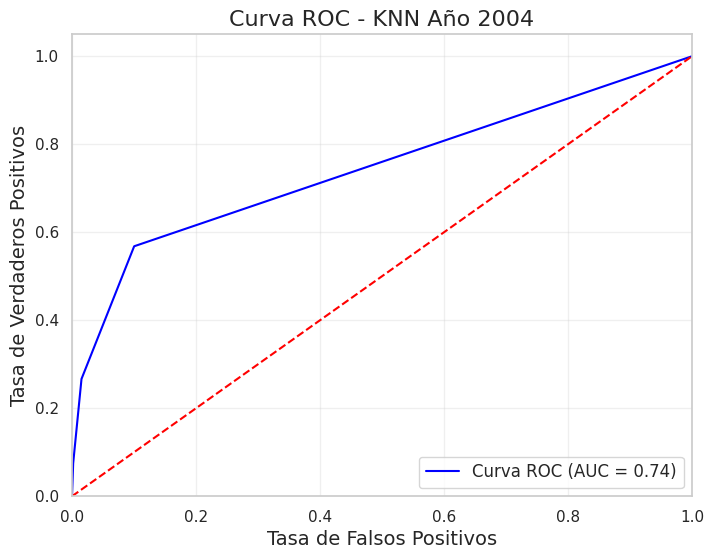

Área bajo la curva (AUC): 0.74


In [164]:
# Crear el modelo KNN con k=3
knn_model_04 = KNeighborsClassifier(n_neighbors=3)

# Ajustar el modelo con los datos de entrenamiento
knn_model_04.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_knn_04 = knn_model_04.predict(X_test)
y_pred_prob_knn_04 = knn_model_04.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Evaluar el modelo
accuracy_knn_04 = accuracy_score(y_test, y_pred_knn_04)
confusion_knn_04 = confusion_matrix(y_test, y_pred_knn_04)

# Calcular la curva ROC y el AUC
fpr_knn_04, tpr_knn_04, thresholds_knn_04 = roc_curve(y_test, y_pred_prob_knn_04)
roc_auc_knn_04 = auc(fpr_knn_04, tpr_knn_04)

# Reportar resultados
print(f"Precisión del modelo KNN (k=3): {accuracy_knn_04:.2f}")
print("Matriz de confusión:")
print(confusion_knn_04)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_04, tpr_knn_04, color='blue', label='Curva ROC (AUC = %0.2f)' % roc_auc_knn_04)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
plt.title('Curva ROC - KNN Año 2004', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Reportar el AUC
print(f"Área bajo la curva (AUC): {roc_auc_knn_04:.2f}")

Precisión del modelo KNN (k=3): 0.97
Matriz de confusión:
[[12829    85]
 [  355    68]]


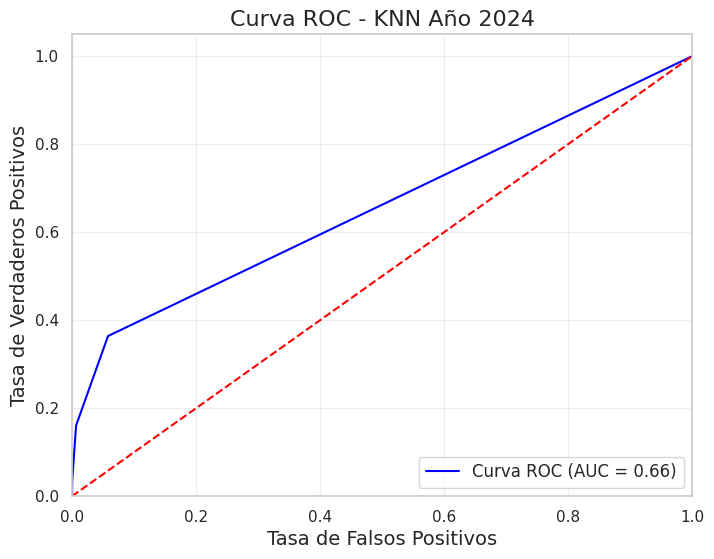

Área bajo la curva (AUC): 0.66


In [165]:
# Crear el modelo KNN con k=3
knn_model_24 = KNeighborsClassifier(n_neighbors=3)

# Ajustar el modelo con los datos de entrenamiento
knn_model_24.fit(X_train2, y_train2)

# Hacer predicciones en el conjunto de prueba
y_pred_knn_24 = knn_model_24.predict(X_test2)
y_pred_prob_knn_24= knn_model_24.predict_proba(X_test2)[:, 1]  # Probabilidades para la clase positiva

# Evaluar el modelo
accuracy_knn_24 = accuracy_score(y_test2, y_pred_knn_24)
confusion_knn_24 = confusion_matrix(y_test2, y_pred_knn_24)

# Calcular la curva ROC y el AUC
fpr_knn_24, tpr_knn_24, thresholds_knn_24 = roc_curve(y_test2, y_pred_prob_knn_24)
roc_auc_knn_24 = auc(fpr_knn_24, tpr_knn_24)

# Reportar resultados
print(f"Precisión del modelo KNN (k=3): {accuracy_knn_24:.2f}")
print("Matriz de confusión:")
print(confusion_knn_24)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_24, tpr_knn_24, color='blue', label='Curva ROC (AUC = %0.2f)' % roc_auc_knn_24)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
plt.title('Curva ROC - KNN Año 2024', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Reportar el AUC
print(f"Área bajo la curva (AUC): {roc_auc_knn_24:.2f}")

### Naive Bayes

Precisión del modelo Naive Bayes: 1.00
Matriz de confusión:
[[12725     0]
 [    1   828]]


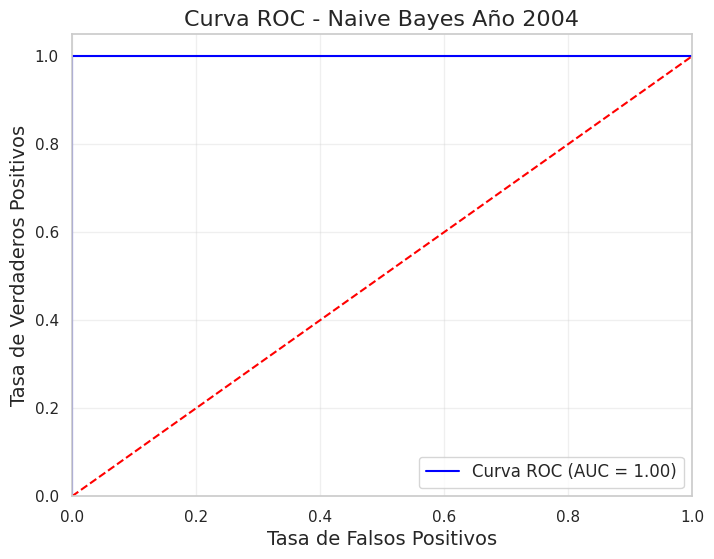

Área bajo la curva (AUC): 1.00


In [166]:
#Naive Bayes 2004

# Crear el modelo Naive Bayes
naive_model_2004 = GaussianNB()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ajustar el modelo con los datos de entrenamiento
naive_model_2004.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
# Hacer predicciones en el conjunto de prueba
y_pred_naive_2004 = naive_model_2004.predict(X_test_scaled)  # Usar directamente el método predict
y_pred_prob_naive_2004 = naive_model_2004.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para la clase positiva

# Evaluar el modelo
accuracy_naive_2004 = accuracy_score(y_test, y_pred_naive_2004)
confusion_naive_2004 = confusion_matrix(y_test, y_pred_naive_2004)

# Calcular la curva ROC y el AUC
fpr_naive_2004, tpr_naive_2004, thresholds_naive_2004 = roc_curve(y_test, y_pred_prob_naive_2004)
roc_auc_naive_2004 = auc(fpr_naive_2004, tpr_naive_2004)

# Reportar resultados
print(f"Precisión del modelo Naive Bayes: {accuracy_naive_2004:.2f}")
print("Matriz de confusión:")
print(confusion_naive_2004)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_naive_2004, tpr_naive_2004, color='blue', label='Curva ROC (AUC = %0.2f)' % roc_auc_naive_2004)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
plt.title('Curva ROC - Naive Bayes Año 2004', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Reportar el AUC
print(f"Área bajo la curva (AUC): {roc_auc_naive_2004:.2f}")

Precisión del modelo Naive Bayes: 0.97
Matriz de confusión:
[[12914     0]
 [  423     0]]


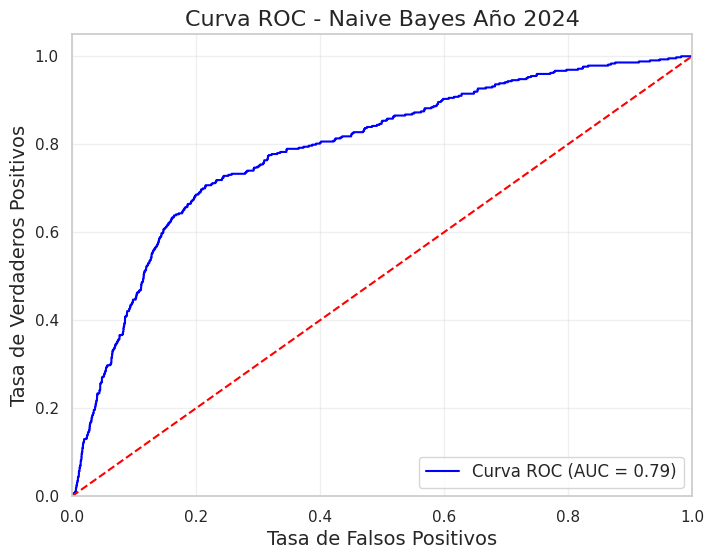

Área bajo la curva (AUC): 0.79


In [167]:
#Naive Bayes 2024

# Crear el modelo Naive Bayes
naive_model_2024 = GaussianNB()

scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

# Ajustar el modelo con los datos de entrenamiento
naive_model_2024.fit(X_train2, y_train2)

# Hacer predicciones en el conjunto de prueba
# Hacer predicciones en el conjunto de prueba
y_pred_naive_2024 = naive_model_2024.predict(X_test2)  # Usar directamente el método predict
y_pred_prob_naive_2024 = naive_model_2024.predict_proba(X_test2)[:, 1]  # Probabilidades para la clase positiva


# Evaluar el modelo
accuracy_naive_2024 = accuracy_score(y_test2, y_pred_naive_2024)
confusion_naive_2024 = confusion_matrix(y_test2, y_pred_naive_2024)

# Calcular la curva ROC y el AUC
fpr_naive_2024, tpr_naive_2024, thresholds_naive_2024 = roc_curve(y_test2, y_pred_prob_naive_2024)
roc_auc_naive_2024 = auc(fpr_naive_2024, tpr_naive_2024)

# Reportar resultados
print(f"Precisión del modelo Naive Bayes: {accuracy_naive_2024:.2f}")
print("Matriz de confusión:")
print(confusion_naive_2024)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_naive_2024, tpr_naive_2024, color='blue', label='Curva ROC (AUC = %0.2f)' % roc_auc_naive_2024)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
plt.title('Curva ROC - Naive Bayes Año 2024', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Reportar el AUC
print(f"Área bajo la curva (AUC): {roc_auc_naive_2024:.2f}")

## Ejercicio 4

In [172]:
# Eliminamos columnas que no son relevantes en norespondieron
variables_calsific_no = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf', "anio"]
norespondieron_clasific_no = norespondieron[variables_calsific_no].copy()
respondieron_clasific_no  = norespondieron_clasific_no .reset_index(drop=True)

# agregamos columnas faltantes
# Agregar una columna con valores nulos (NaN)
norespondieron_clasific['missing_column_1'] = 0
norespondieron_clasific['missing_column_2'] = 0


In [173]:
# Mapeamos las variables con distintos tipos de datos en norespondieron_clasific

# Mapeo para la columna "ch04" (Sexo)
ch04_mapping = {
    "Varón": 0,
    "Mujer": 1
}
norespondieron_clasific["ch04"] = norespondieron_clasific["ch04"].replace(ch04_mapping)

# Mapeo para la columna "ch07" (Estado civil)
ch07_mapping = {
    "Unido": 1,
    "Casado": 2,
    "Separado o divorciado": 3,
    "Viudo": 4,
    "Soltero": 5
}
norespondieron_clasific["ch07"] = norespondieron_clasific["ch07"].replace(ch07_mapping)

# Mapeo para la columna "ch08" (Cobertura médica)
ch08_mapping = {
    "Obra social (incluye PAMI)": 1,
    "Mutual/Prepaga/Servicio de emergencia": 2,
    "Planes y seguros públicos": 3,
    "No paga ni le descuentan": 4,
    "Ns./Nr.": 9,
    "Obra social y mutual/prepaga/servicio de emergencia": 12,
    "Obra social y planes y seguros públicos": 13,
    "Mutual/prepaga/servicio de emergencia/planes y seguros públicos": 23,
    "Mutual/prepaga/servicio de emergencia/planes y seguros públi": 23,
    "Obra social, mutual/prepaga/servicio de emergencia y planes": 123
}
norespondieron_clasific["ch08"] = norespondieron_clasific["ch08"].replace(ch08_mapping)

# Reemplazar los valores que comienzan con "Entrevista individual no realizada"
norespondieron_clasific['estado'] = norespondieron_clasific['estado'].replace(
    'Entrevista individual no realizada (no respuesta al cuestion', 'Entrevista no realizada'
)

# Mapeo para la columna "estado" (Condición de actividad)
estado_mapping = {
    "Entrevista no realizada": 0,
    "Ocupado": 1,
    "Desocupado": 2,
    "Inactivo": 3,
    "Menor de 10 años": 4
}
norespondieron_clasific["estado"] = norespondieron_clasific["estado"].replace(estado_mapping)

# Mapeo para la columna "cat_inac" (Categoría de inactividad)
cat_inac_mapping = {
    "Jubilado/pensionado": 1,
    "Rentista": 2,
    "Estudiante": 3,
    "Ama de casa": 4,
    "Menor de 6 años": 5,
    "Discapacitado": 6,
    "Otros": 7
}
norespondieron_clasific["cat_inac"] = norespondieron_clasific["cat_inac"].replace(cat_inac_mapping)

# Mapeo para la columna "nivel_ed" (Nivel educativo)
# Modificamos categoría para simplificar
norespondieron_clasific.loc[
    norespondieron_clasific['nivel_ed'] == 'Primaria Incompleta (incluye educación especial)', 'nivel_ed'
] = 'Primaria Incompleta'

# Modificamos la columna 'nivel_ed'
norespondieron_clasific['nivel_ed'] = norespondieron_clasific['nivel_ed'].replace({
    'Primaria Incompleta': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Sin instrucción': 7
})

# Convertimos todos los valores de "CH06" a numéricos
norespondieron_clasific["ch06"] = norespondieron_clasific["ch06"].replace({
    "Menos de 1 año": 1,
    "98 y más años": 98
})  # Reemplazamos el string "Menos de 1 año" por 1 y "98 y más años" por 98

# Convertimos la columna a numérica para asegurar la consistencia de los datos
norespondieron_clasific["ch06"] = norespondieron_clasific["ch06"].astype(int)


<ipython-input-173-0ae10341df87>:64: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Primaria Incompleta' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  norespondieron_clasific.loc[
<ipython-input-173-0ae10341df87>:69: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  norespondieron_clasific['nivel_ed'] = norespondieron_clasific['nivel_ed'].replace({


In [174]:
norespondieron_clasific.head()

,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,missing_column_1,missing_column_2
0,0,21,5,3,3,0,0.0,40.0,0,0
1,1,49,4,4,2,0,0.0,0.0,0,0
2,0,24,5,1,3,0,0.0,0.0,0,0
3,1,20,5,4,4,0,0.0,0.0,0,0
4,1,35,3,4,5,0,0.0,294.0,0,0


In [183]:
# Predecir las probabilidades de ser desocupado con el modelo de 2004

y_pred_prob_norespondieron = modelo04.predict_proba(norespondieron_clasific)[:, 1]
y_pred_norespondieron = np.where(y_pred_prob_norespondieron > 0.5, 1, 0)

# Contar el número de desocupados predichos
num_desocupados_noresp = np.sum(y_pred_norespondieron == 1)
print(f"El número de desocupados predichos es {num_desocupados_noresp}")

total_personas_noresp = len(y_pred_norespondieron)

# Proporción de desocupados
proporcion_desocupados_noresp = num_desocupados_noresp / total_personas_noresp
print(f"La proporción de desocupados predicha es {proporcion_desocupados_noresp.round(3)} \n");

El número de desocupados predichos es 75
La proporción de desocupados predicha es 0.743 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [184]:
# Predecir las probabilidades de ser desocupado con el modelo de 2024

y_pred_prob_norespondieron2 = modelo24.predict_proba(norespondieron_clasific)[:, 1]
y_pred_norespondieron2 = np.where(y_pred_prob_norespondieron2 > 0.5, 1, 0)

# Contar el número de desocupados predichos
num_desocupados_noresp2 = np.sum(y_pred_norespondieron2 == 1)
print(f"El número de desocupados predichos es {num_desocupados_noresp2}")

total_personas_noresp2 = len(y_pred_norespondieron2)

# Proporción de desocupados
proporcion_desocupados_noresp2 = num_desocupados_noresp2 / total_personas_noresp2
print(f"La proporción de desocupados predicha es {proporcion_desocupados_noresp2.round(3)} \n");

El número de desocupados predichos es 50
La proporción de desocupados predicha es 0.495 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
